Visualising Data
================

The purpose of scientific computation is insight not numbers: To understand the meaning of the (many) numbers we compute, we often need postprocessing, statistical analysis and graphical visualisation of our data. The following sections describe

-   Matplotlib/Pylab — which allows us to generate high quality graphs of the type *y* = *f*(*x*) (and a bit more)

-   Visual Python — which is a very handy tool to quickly generate animations of time dependent processes taking place in 3d space.

Matplotlib (Pylab) – plotting y=f(x), (and a bit more)
------------------------------------------------------

The Python library *Matplotlib* is a python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments. Matplotlib tries to make easy things easy and hard things possible. You can generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc, with just a few lines of code.

For more detailed information, check these links

-   A very nice introduction in the object oriented Matplotlib interface, and summary of all important ways of changing style, figure size, linewidth, etc. This is a useful reference:
    <http://nbviewer.ipython.org/urls/raw.github.com/jrjohansson/scientific-python-lectures/master/Lecture-4-Matplotlib.ipynb>

-   Matplotlib tutorial

-   Matplotlib home page

-   List of simple screenshot examples <http://matplotlib.sourceforge.net/users/screenshots.html>

-   Extended thumbnail gallery of examples <http://matplotlib.sourceforge.net/gallery.html>

### Matplotlib and Pylab

Matplotlib as *an object oriented plotting library*. Pylab is an interface to the same set of functions that imitates the (state-driven) Matlab plotting interface.

Pylab is slightly more convenient to use for easy plots, and Matplotlib gives far more detailed control over how plots are created. If you use Matplotlib routinely to produce figures, you are well advised to learn about the object oriented matplotlib interface (instead of the pylab interface).

This chapter focusses on the Pylab interface.

An excellent introduction and overview of the Matplotlib plotting interface is available in<http://nbviewer.ipython.org/urls/raw.github.com/jrjohansson/scientific-python-lectures/master/Lecture-4-Matplotlib.ipynb>.

### First example

The recommended way of using Matplotlib in a simple example is shown here (let’s call this example 1a):

In [1]:
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')       # change the format to SVG

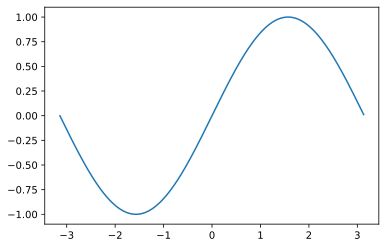

In [2]:
# example 1 a
import numpy as np                  # get access to fast arrays
import matplotlib.pyplot as plt     # the plotting functions   

x = np.arange(-3.14, 3.14, 0.01)    # create x-data
y = np.sin(x)                       # compute y - data
plt.plot(x, y)                      # create plot

### How to import matplotlib, pylab, pyplot, numpy and all that

The submodule `matplotlib.pyplot` provides an object oriented interface to the plotting library. Many of the examples in the matplotlib documentation follow the import convention to import `matplotlib.pyplot` as `plt` and `numpy` as `np`. It is of course entirely the user’s decision whether to import the `numpy` library under the name `np` (as often done in matplotlib examples) or `N` as done in this text (and in the early days when the predecessor of numpy was called “Numeric”) or any other name you like. Similarly, it is a matter of taste whether the plotting submodule (`matplotlib.pyplot`) is imported as `plt` as is done in the matplotlib documentation or `plot` (which could be argued is slightly clearer) etc.

As always a balance has to be struck between personal preferences and consistency with common practice in choosing these name. Consistency with common use is of course more important if the code is likely to be used by others or published.

Plotting nearly always needs arrays of numerical data and it is for this reason that the `numpy` module is used a lot: it provides fast and memory efficient array handling for Python (see [chapter 14](14-numpy.ipynb)).

We could thus also have written the example 1a above as in example 1b (which is identical in functionality to the example above and will create the same plot):

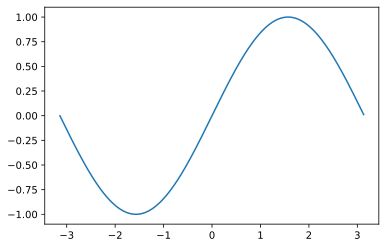

In [3]:
import pylab
import numpy as N

x = N.arange (-3.14, 3.14, 0.01)
y = N.sin(x)

pylab.plot(x, y)

Because the `numpy.arange` and `numpy.sin` objects have already been imported into the (convenience) `pylab` namespace, we could also write it as example 1c:

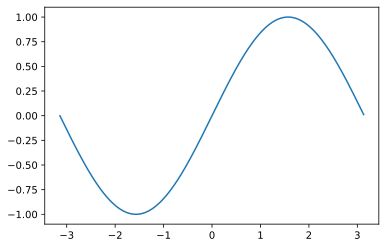

In [4]:
#example 1c
import pylab as p

x = p.arange(-3.14, 3.14, 0.01)
y = p.sin(x)

p.plot(x, y)

If we really want to cut down on characters to type, we could also important the whole functionality from the `pylab` convenience module, and rewrite the code as example 1d:

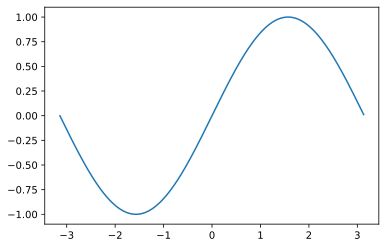

In [5]:
#example 1 d
from pylab import *  # not generally recommended
                     # okay for interactive testing

x = arange(-3.14, 3.14, 0.01)
y = sin(x)
plot(x, y)
show()

This can be extremely convenient, but comes with a big health warning:

-   While using `from pylab import *` is acceptable at the command prompt to interactively create plots and analyse data, this should never be used in any plotting scripts.

-   The pylab toplevel provides over 800 different objects which are all imported into the global name space when running `from pylab import *`. This is not good practice, and could conflict with other objects that exist already or are created later.

-   As a rule of thumb: do never use `from somewhere import *` in programs we save. This may be okay at the command prompt.

In the following examples, we usually use the `pylab` interface to the plotting routines but this is purely a matter of taste and habit and by no means the only way (note that the Matplotlib authors recommend the import style as in example 1a, see also this [Matplot FAQ entry](http://matplotlib.sourceforge.net/faq): [Matplotlib, pylab, and pyplot: how are they related?](http://matplotlib.sourceforge.net/faq/usage_faq.html#matplotlib-pylab-and-pyplot-how-are-they-related))

### IPython’s inline mode

Within the Jupyter Notebook or Qtconsole (see the [Python shells notebook](11-python-shells.ipynb)) we can use the `%matplotlib inline` magic command to make further plots appear within our console or notebook. To force pop up windows instead, use `%matplotlib qt`.

There is also the `%pylab` magic, which will not only switch to inline plotting but also automatically execute `from pylab import *`.

### Saving the figure to a file

Once you have created the figure (using the `plot` command) and added any labels, legends etc, you have two options to save the plot.

1.  You can display the figure (using `show`) and *interactively* save it by clicking on the disk icon.

2.  You can (without displaying the figure) save it directly from your Python code. The command to use is `savefig`. The format is determined by the extension of the file name you provide. Here is an example (`pylabsavefig.py`) which saves the plot shown in Figure \[fig:pylab1

In [6]:
import pylab
import numpy as N

x = N.arange(-3.14, 3.14, 0.01)
y = N.sin(x)

pylab.plot(x, y, label='sin(x)')
pylab.savefig('myplot.png')  # saves png file
pylab.savefig('myplot.eps')  # saves eps file
pylab.savefig('myplot.pdf')  # saves pdf file
pylab.close()

A note on file formats: Choose the `png` file format if you plan to include your graph in a word document or on a webpage. Choose the `eps` or `pdf` file format if you plan to include the figure in a Latex document – depending on whether you want to compile it using `latex` (needs `eps`) or pdflatex (can use `pdf` \[better\] or `png`). If the version of MS Word (or other text processing software you use) can handle `pdf` files, it is better to use `pdf` than `png`.

Both `pdf` and `eps` are vector file formats which means that one can zoom into the image without loosing quality (lines will still be sharp). File formats such as `png` (and `jpg`, `gif`, `tif`, `bmp`) save the image in form of a bitmap (i.e. a matrix of colour values) and will appear blurry or pixelated when zooming in (or when printed in high resolution).

### Interactive mode

Matplotlib can be run in two modes:

-   non-interactive (this is the default)

-   interactive.

In non-interactive mode, no plots will be displayed until the `show()` command has been issued. In this mode, the `show()` command should be the last statement of your program.

In interactive mode, plots will be immediately displayed after the plot command has been issued.

One can switch the interactive mode on using `pylab.ion()` and off using `pylab.ioff()`. IPython's `%matplotlib` magic also enables interactive mode.

### Fine tuning your plot

Matplotlib allows us to fine tune our plots in great detail. Here is an example:

Text(0.5, 1.0, 'This is the title of the graph')

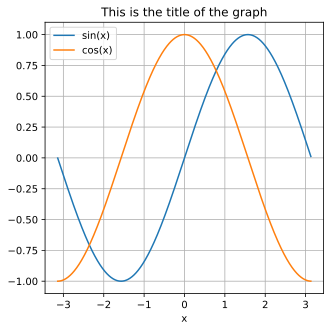

In [7]:
import pylab
import numpy as N

x = N.arange(-3.14, 3.14, 0.01)
y1 = N.sin(x)
y2 = N.cos(x)
pylab.figure(figsize =(5 , 5))
pylab.plot(x, y1, label='sin(x)')
pylab.plot(x, y2, label='cos(x)')
pylab.legend()
pylab.grid()
pylab.xlabel('x')
pylab.title('This is the title of the graph')

showing some other useful commands:

-   `figure(figsize=(5,5))` sets the figure size to 5inch by 5inch

-   `plot(x,y1,label=’sin(x)’)` The “label” keyword defines the name of this line. The line label will be shown in the legend if the `legend()` command is used later.

-   Note that calling the `plot` command repeatedly, allows you to overlay a number of curves.

-   `axis([-2,2,-1,1])` This fixes the displayed area to go from xmin=-2 to xmax=2 in x-direction, and from ymin=-1 to ymax=1 in y-direction

-   `legend()` This command will display a legend with the labels as defined in the plot command. Try `help(pylab.legend)` to learn more about the placement of the legend.

-   `grid()` This command will display a grid on the backdrop.

-   `xlabel(’...’)` and `ylabel(’...’)` allow labelling the axes.

Note further than you can chose different line styles, line thicknesses, symbols and colours for the data to be plotted. (The syntax is very similar to MATLAB.) For example:

-   `plot(x,y,’og’)` will plot circles (`o`) in green (`g`)

-   `plot(x,y,’-r’)` will plot a line (`-`) in red (`r`)

-   `plot(x,y,’-b’,linewidth=2)` will plot a blue line (`b`) with two two pixel thickness `linewidth=2` which is twice as wide as the default.

The full list of options can be found when typing `help(pylab.plot)` at the Python prompt. Because this documentation is so useful, we repeat parts of it here:

    plot(*args, **kwargs)
        Plot lines and/or markers to the
        :class:`~matplotlib.axes.Axes`.  *args* is a variable length
        argument, allowing for multiple *x*, *y* pairs with an
        optional format string.  For example, each of the following is
        legal::

            plot(x, y)         # plot x and y using default line style and color
            plot(x, y, 'bo')   # plot x and y using blue circle markers
            plot(y)            # plot y using x as index array 0..N-1
            plot(y, 'r+')      # ditto, but with red plusses

        If *x* and/or *y* is 2-dimensional, then the corresponding columns
        will be plotted.

        An arbitrary number of *x*, *y*, *fmt* groups can be
        specified, as in::

            a.plot(x1, y1, 'g^', x2, y2, 'g-')

        Return value is a list of lines that were added.

        The following format string characters are accepted to control
        the line style or marker:

        ================    ===============================
        character           description
        ================    ===============================
        '-'                 solid line style
        '--'                dashed line style
        '-.'                dash-dot line style
        ':'                 dotted line style
        '.'                 point marker
        ','                 pixel marker
        'o'                 circle marker
        'v'                 triangle_down marker
        '^'                 triangle_up marker
        '<'                 triangle_left marker
        '>'                 triangle_right marker
        '1'                 tri_down marker
        '2'                 tri_up marker
        '3'                 tri_left marker
        '4'                 tri_right marker
        's'                 square marker
        'p'                 pentagon marker
        '*'                 star marker
        'h'                 hexagon1 marker
        'H'                 hexagon2 marker
        '+'                 plus marker
        'x'                 x marker
        'D'                 diamond marker
        'd'                 thin_diamond marker
        '|'                 vline marker
        '_'                 hline marker
        ================    ===============================

    The following color abbreviations are supported:

    ==========  ========
    character   color
    ==========  ========
    'b'         blue
    'g'         green
    'r'         red
    'c'         cyan
    'm'         magenta
    'y'         yellow
    'k'         black
    'w'         white
    ==========  ========

    In addition, you can specify colors in many weird and
    wonderful ways, including full names (``'green'``), hex
    strings (``'#008000'``), RGB or RGBA tuples (``(0,1,0,1)``) or
    grayscale intensities as a string (``'0.8'``).  Of these, the
    string specifications can be used in place of a ``fmt`` group,
    but the tuple forms can be used only as ``kwargs``.

    Line styles and colors are combined in a single format string, as in
    ``'bo'`` for blue circles.

    The *kwargs* can be used to set line properties (any property that has
    a ``set_*`` method).  You can use this to set a line label (for auto
    legends), linewidth, anitialising, marker face color, etc.  Here is an
    example::

        plot([1,2,3], [1,2,3], 'go-', label='line 1', linewidth=2)
        plot([1,2,3], [1,4,9], 'rs',  label='line 2')
        axis([0, 4, 0, 10])
        legend()

    If you make multiple lines with one plot command, the kwargs
    apply to all those lines, e.g.::

        plot(x1, y1, x2, y2, antialised=False)

    Neither line will be antialiased.

    You do not need to use format strings, which are just
    abbreviations.  All of the line properties can be controlled
    by keyword arguments.  For example, you can set the color,
    marker, linestyle, and markercolor with::

        plot(x, y, color='green', linestyle='dashed', marker='o',
             markerfacecolor='blue', markersize=12).  See
             :class:`~matplotlib.lines.Line2D` for details.

The use of different line styles and thicknesses is particularly useful when colour cannot be used to distinguish lines (for example when graph will be used in document that is to be printed in black and white only).

### Plotting more than one curve

There are three different methods to display more than one curve.

#### Two (or more) curves in one graph

By calling the `plot` command repeatedly, more than one curve can be drawn in the same graph. Example:

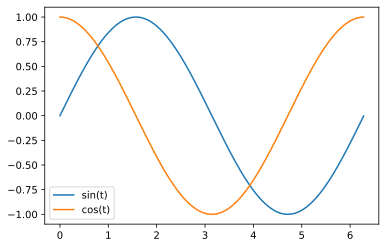

In [8]:
import numpy as N
t = N.arange(0,2*N.pi,0.01)

import pylab
pylab.plot(t,N.sin(t),label='sin(t)')
pylab.plot(t,N.cos(t),label='cos(t)')
pylab.legend()

#### Two (or more graphs) in one figure window

The `pylab.subplot` command allows to arrange several graphs within one figure window. The general syntax is

    subplot(numRows, numCols, plotNum)

For example, to arrange 4 graphs in a 2-by-2 matrix, and to select the first graph for the next plot command, one can use:

```python
subplot(2, 2, 1)
```

Here is a complete example plotting the sine and cosine curves in two graphs that are aligned underneath each other within the same window:

Text(0, 0.5, 'cos(t)')

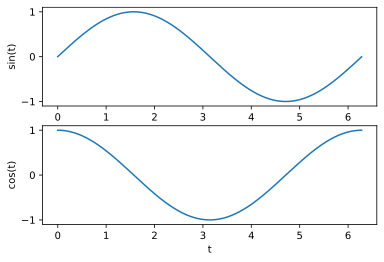

In [9]:
import numpy as N
t = N.arange (0 , 2 * N . pi , 0.01)

import pylab

pylab.subplot(2, 1, 1)
pylab.plot(t, N.sin(t))
pylab.xlabel('t')
pylab.ylabel('sin(t)')

pylab.subplot(2, 1, 2)
pylab.plot(t, N.cos(t))
pylab.xlabel('t')
pylab.ylabel('cos(t)')

#### Two (or more) figure windows

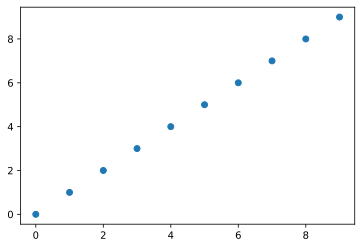

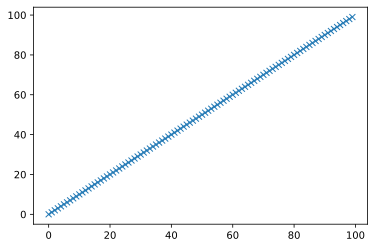

In [10]:
import pylab
pylab.figure(1)
pylab.plot(range(10),'o')

pylab.figure(2)
pylab.plot(range(100),'x')

Note that you can use `pylab.close()` to close one, some or all figure windows (use `help(pylab.close)` to learn more).

### Histograms

<embed src="code/pylab/pylabhistogram.pdf" style="width:100.0%" />

The program below demonstrates how to create histograms from statistical data in Matplotlib. The resulting plot is show in figure

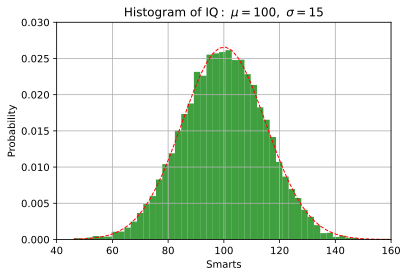

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

mu, sigma = 100, 15
x = mu + sigma*np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = scipy.stats.norm.pdf(bins, mu, sigma)

# create the plot
l = plt.plot(bins, y, 'r--', linewidth=1)

# annotate the plot
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

Do not try to understand every single command in this file: some are rather specialised and have not been covered in this text. The intention is to provide a few examples to show what can – in principle – be done with Matplotlib. If you need a plot like this, the expectation is that you will need to experiment and possibly learn a bit more about Matplotlib.

### Visualising matrix data

The program below demonstrates how to create a bitmap-plot of the entries of a matrix.

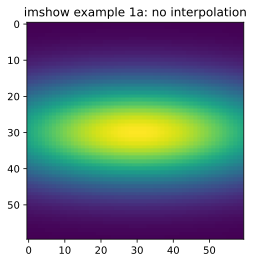

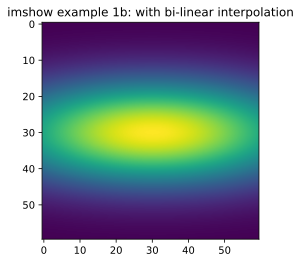

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Helper function (from https://github.com/matplotlib/matplotlib/blob/master/lib/matplotlib/mlab.py
# as of August 2018)
def bivariate_normal(X, Y, sigmax=1.0, sigmay=1.0,
                     mux=0.0, muy=0.0, sigmaxy=0.0):
    """
    Bivariate Gaussian distribution for equal shape *X*, *Y*.
    See `bivariate normal
    <http://mathworld.wolfram.com/BivariateNormalDistribution.html>`_
    at mathworld.
    """
    Xmu = X-mux
    Ymu = Y-muy

    rho = sigmaxy/(sigmax*sigmay)
    z = Xmu**2/sigmax**2 + Ymu**2/sigmay**2 - 2*rho*Xmu*Ymu/(sigmax*sigmay)
    denom = 2*np.pi*sigmax*sigmay*np.sqrt(1-rho**2)
    return np.exp(-z/(2*(1-rho**2))) / denom

# create matrix Z that contains some interesting data
delta = 0.1
x = y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z = bivariate_normal(X, Y, 3.0, 1.0, 0.0, 0.0)

# display the 'raw' matrix data of Z in one figure
plt.figure(1)
plt.imshow(Z, interpolation='nearest')
plt.title("imshow example 1a: no interpolation")
plt.savefig("pylabimshow1a.pdf")

# display the data interpolated in other figure
plt.figure(2)
im = plt.imshow(Z, interpolation='bilinear')
plt.title("imshow example 1b: with bi-linear interpolation")
plt.savefig("pylabimshow1b.pdf")

To use different colourmaps, we make use of the `matplotlib.cm` module (where cm stands for Colour Map). The code below demonstrates how we can select colourmaps from the set of already provided maps, and how we can modify them (here by reducing the number of colours in the map). The last example mimics the behaviour of the more sophisticated `contour` command that also comes with `matplotlib`.

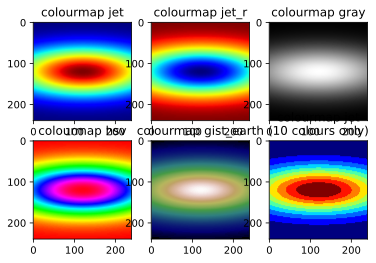

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm        # Colour map submodule

#create matrix Z that contains some data interesting data
delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z = bivariate_normal(X, Y, 3.0, 1.0, 0.0, 0.0)

Nx, Ny = 2, 3
plt.subplot(Nx, Ny, 1)  # next plot will be shown in
                        # first subplot in Nx x Ny
                        # matrix of subplots

plt.imshow(Z, cmap=cm.jet)  # default colourmap 'jet'
plt.title("colourmap jet")

plt.subplot(Nx, Ny, 2)   # next plot for second subplot
plt.imshow(Z, cmap=cm.jet_r)  # reverse colours in jet
plt.title("colourmap jet_r")

plt.subplot(Nx, Ny, 3)
plt.imshow(Z, cmap=cm.gray)
plt.title("colourmap gray")

plt.subplot(Nx, Ny, 4)
plt.imshow(Z, cmap=cm.hsv)
plt.title("colourmap hsv")

plt.subplot(Nx, Ny, 5)
plt.imshow(Z, cmap=cm.gist_earth)
plt.title("colourmap gist_earth")

plt.subplot(Nx, Ny, 6)
# make isolines by reducing number of colours to 10
mycmap = cm.get_cmap('jet', 10)    # 10 discrete colors
plt.imshow(Z, cmap=mycmap)
plt.title("colourmap jet\n(10 colours only)")

plt.savefig("pylabimshowcm.pdf")

### Plots of *z* = *f*(*x*, *y*) and other features of Matplotlib

Matplotlib has a large number of features and can create all the standard (1d and 2d) plots such as histograms, pie charts, scatter plots, 2d-intensity plots (i.e. *z* = *f*(*x*, *y*)) and contour lines) and much more. Figure \[fig:pylabcontour\_demo\] shows such an example (the `contour_demo.py` program is a standard example of the `pylab` package). This link provides source code to produce this kind of plot: [contour\_demo.py](http://matplotlib.org/examples/pylab_examples/contour_demo.html)

Other examples are

-  <http://matplotlib.org/users/screenshots.html>
-   <http://matplotlib.org/gallery.html>
-   Recently, creation of 3d-plots has been added to pylab: <http://matplotlib.org/examples/mplot3d/index.html#mplot3d-examples>

<img src="static/images/pylab/contour_demo.png" alt="The output of contour_demo.py." style="width:80.0%" />

Visual Python
-------------

Visual Python is a Python module that makes it fairly easy to create and animate three-dimensional scenes.

Further information:

-   The Visual Python home page

-   The Visual Python documentation (explaining all objects with all their parameters)

Short videos introducing Visual Python:

-   Shawn Weatherford, Jeff Polak (students of Ruth Chabay): <http://www.youtube.com/vpythonvideos>

-   Eric Thompson: <http://showmedo.com/videotutorials/series?name=pythonThompsonVPythonSeries>

### Basics, rotating and zooming

Here is an example showing how to create a red and a blue sphere at two different positions together with a flat box (`vpythondemo1.py`):

```python
import visual
sphere1 = visual.sphere(pos=[0, 0, 0], color=visual.color.blue)
sphere2 = visual.sphere(pos=[5, 0, 0], color=visual.color.red, radius=2)
base = visual.box(pos=(0, -2, 0), length=8, height=0.1, width=10)
```

<img src="static/images/visual/vpythondemo1.png" alt="Snapshot of vpythondemo1.py." style="width:50.0%" />

Once you have created such a visual python scene, you can

-   rotate the scene by pressing the right mouse button and moving the mouse

-   zoom in and out by pressing the middle mouse button (this could be the wheel) and moving the mouse up and down. (On some (Windows?) installations, one has to press the left and the right mouse button simultaneously and then move the move the mouse up and down to zoom.)

### Setting the frame rate for animations

A particular strength of Visual Python is its ability to display time-dependent data:

-   A very useful command is the `rate()` command which ensures that a loop is only executed at a certain frame rate. Here is an example printing exactly two “Hello World”s per second (`vpythondemo2.py`):

```python
import visual

for i in range(10):
    visual.rate(2)
    print("Hello World (0.5 seconds per line)")
```

-   All Visual Python objects (such as the spheres and the box in the example above) have a `.pos` attribute which contains the position (of the centre of the object \[sphere,box\] or one end of the object \[cylinder,helix\]). Here is an example showing a sphere moving up and down (`vpythondemo3.py`):

```python
import visual, math

ball = visual.sphere()
box = visual.box( pos=[0,-1,0], width=4, length=4, height=0.5 )

#tell visual not to automatically scale the image
visual.scene.autoscale = False

for i in range(1000):
    t = i*0.1
    y = math.sin(t)

    #update the ball's position
    ball.pos = [0, y, 0]

    #ensure we have only 24 frames per second
    visual.rate(24)
```

<img src="static/images/visual/vpythondemo3.png" alt="Snapshot of vpythondemo3.py." style="width:50.0%" />

### Tracking trajectories

You can track the trajectory of an object using a “curve”. The basic idea is to append positions to that curve object as demonstrated in this example (`vpythondemo4.py`):

```python
import visual, math

ball = visual.sphere()
box = visual.box( pos=[0,-1,0], width=4, length=4, height=0.5 )
trace=visual.curve( radius=0.2, color=visual.color.green)

for i in range(1000):
    t = i*0.1
    y = math.sin(t)

    #update the ball's position
    ball.pos = [t, y, 0]

    trace.append( ball.pos )

    #ensure we have only 24 frames per second
    visual.rate(24)
```

<img src="static/images/visual/vpythondemo4.png" alt="Snapshot of vpythondemo4.py." style="width:50.0%" />

As with most visual Python objects, you can specify the colour of the curve (also per appended element!) and the radius.

### Connecting objects (Cylinders, springs, …)

Cylinders and helices can be used to “connect” two objects. In addition to the `pos` attribute (which stores the position of one end of the object), there is also an `axis` attribute which stores the vector pointing from `pos` to the other end of the object. Here is an example showing this for a cylinder: (`vpythondemo5py`):

```python
import visual, math

ball1 = visual.sphere( pos = (0,0,0), radius=2 )
ball2 = visual.sphere( pos = (5,0,0), radius=2 )
connection = visual.cylinder(pos = ball1.pos, \
                             axis = ball2.pos - ball1.pos)

for t in range(100):
    #move ball2 
    ball2.pos = (-t,math.sin(t),math.cos(t))

    #keep cylinder connection between ball1 and ball2
    connection.axis = ball2.pos - ball1.pos

    visual.rate(24)
```

### 3d vision

If you have access to “anaglyphic” (*i.e.* colored) glasses (best red-cyan but red-green or red-blue works as well), then you can switch visual python into this stereo mode by adding these two lines to the beginning of your program:

```python
visual.scene.stereo='redcyan'
visual.scene.stereodepth=1
```

Note the effect of the `stereodepth` parameter:

-   `stereodepth=0`: 3d scene “inside” the screen (default)

-   `stereodepth=1`: 3d scene at screen surface (this often looks best)

-   `stereodepth=2`: 3d scene sticking out of the screen

<img src="static/images/visual/vpythondemo3_3d.png" alt="Snapshot of vpythondemo3.py in 3d mode (’redcyan’). With red/cyan glasses, this appears as a 3d image (with spatial depth)." style="width:50.0%" />

Visualising higher dimensional data
-----------------------------------

Often, we need to understand data defined at 3d positions in space. The data itself is often a scalar field (such as temperature) or a 3d vector (such as velocity or magnetic field), or occasionally a tensor. For example for a 3d-vector field *f* defined in 3d-space ($\vec{f}(\vec{x})$ where $\vec{x} \in I\!\!R^3$ and $\vec{f}(\vec{x})
\in I\!\!R^3$) we could draw a 3d-arrow at every (grid) point in space. It is common for these data sets to be time dependent.

The probably most commonly used library in Science and Engineering to visualise such data sets is probably VTK, the Visualisation ToolKit (<http://vtk.org>). This is a substantial C++ library with interfaces to high level languages, including Python.

One can either call these routines directly from Python code, or write the data to disk in a format that the VTK library can read (so called vtk data files), and then use stand-alone programme such as Mayavi, ParaView and VisIt to read these data files and manipulate them (ofter with a GUI). All three of these are using the VTK library internally, and can read vtk data files.

These package is very well suited to visualise static and timedependent 2d and 3d-fields (scalar, vector and tensor fields). Two examples are shown below.

They can be used as a stand-alone executables with a GUI to visualise VTK files. It can also be scripted from a Python program, or used interactively from a Python session.

### Mayavi, Paraview, Visit

-   Mayavi Home page <http://code.enthought.com/projects/mayavi/>

-   Paraview Home page <http://paraview.org>

-   VisIt Home page <https://wci.llnl.gov/simulation/computer-codes/visit/>

<img src="static/images/mayavi/vector_field_combination.png" alt="image" style="width:49.0%" /><img src="static/images/mayavi/mayavi-samp.png" alt="image" style="width:49.0%" />

Two examples from MayaVi visualisations.

### Writing vtk files from Python (pyvtk)

A small but powerful Python library is pyvtk available at https://github.com/pearu/pyvtk. This allows to create vtk files from Python data structures very easily.

Given a finite element mesh or a finite difference data set in Python, one can use pyvtk to write such data into files, and then use one of the visualisation applications listed above to load the vtk files and to display and investigate them.